In [1]:
# Import necessary libraries
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# 1. Introduction to CIFAR-10 Dataset

# Loading and dataset description

In [3]:
# Load and describe the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Significance of using CIFAR-10

CIFAR-10 is a popular dataset used for learning image classification tasks, and it holds significance for several reasons:

Real-world relevance: CIFAR-10 consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes represent common objects and animals such as airplanes, cars, birds, cats, and dogs. This diversity reflects real-world scenarios, making the dataset suitable for training models to recognize common objects in everyday life.
Challenging yet manageable: While CIFAR-10 is smaller in scale compared to some other image datasets like ImageNet, it's still challenging enough to require sophisticated models for accurate classification. Its manageable size makes it suitable for experimentation and prototyping without requiring extensive computational resources.
Benchmarking: CIFAR-10 serves as a benchmark dataset for evaluating the performance of various machine learning and deep learning algorithms, especially in the field of computer vision. Researchers often use it to compare the effectiveness of different techniques, architectures, and optimizations.
Education and research: CIFAR-10 is widely used in educational settings to teach concepts of image classification, deep learning, and machine learning in general. Its straightforward structure and manageable size make it accessible for students and researchers alike, facilitating experimentation and learning.
Transfer learning: Models trained on CIFAR-10 can be used as a starting point for transfer learning tasks. Pre-trained models on CIFAR-10 can be fine-tuned on other datasets or tasks, leveraging the knowledge gained from learning on CIFAR-10 to improve performance on related tasks.

# 2. Data Preprocessing

# Visualize and display images from the dataset

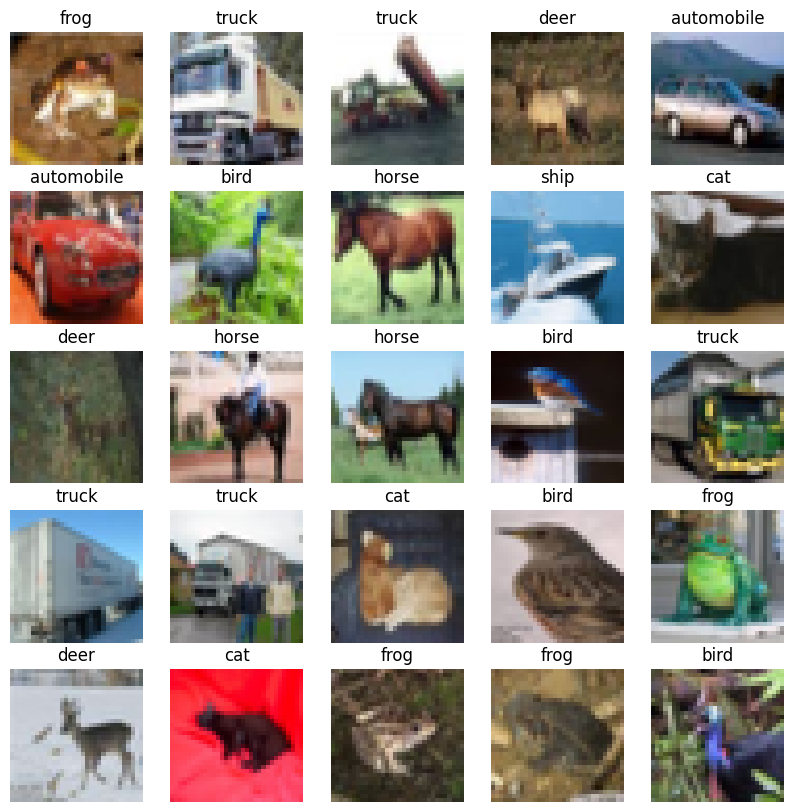

In [4]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

# Normalize pixel values

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshaping and Flattening of Data

In [6]:
# CIFAR-10 image dimensions
image_height = 32
image_width = 32
num_channels = 3  # RGB

# Reshape CIFAR-10 data
x_train_reshaped = x_train.reshape(x_train.shape[0], image_height, image_width, num_channels)
x_test_reshaped = x_test.reshape(x_test.shape[0], image_height, image_width, num_channels)


# Convert class vectors to binary class matrices (one-hot encoding)

In [7]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 3. Building the Neural Network

In [8]:
from keras.layers import Dropout

model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='sigmoid'),
    Dropout(0.5),  # Adding dropout with a rate of 0.5
    Dense(256, activation='sigmoid'),
    Dropout(0.5),  # Adding dropout with a rate of 0.5
    Dense(num_classes, activation='softmax')
])


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Explain the choice of activation function, particularly softmax for the output layer.

Sigmoid Activation Function:

The sigmoid activation function (activation='sigmoid') is used in the hidden layers of the neural network. Sigmoid functions are bounded between 0 and 1, which can be useful for ensuring that the activations remain within a certain range, making training more stable.
Historically, sigmoid activation functions were widely used in neural networks. They introduce non-linearity to the network, allowing it to learn complex relationships in the data. However, they suffer from the vanishing gradient problem, which can slow down or hinder the training process, especially in deep networks.

Softmax Activation Function:

The softmax activation function (activation='softmax') is used in the output layer of the neural network. Softmax is commonly used for multi-class classification problems, where the goal is to predict the probability distribution over multiple classes.
Softmax takes a vector of arbitrary real-valued scores (often referred to as logits) as input and normalizes them into a probability distribution where the sum of probabilities across all classes equals 1. This makes it suitable for classification tasks where the model needs to output probabilities for each class.

By using softmax, the output of the model can be interpreted as the probability of the input belonging to each class. This is useful for determining the predicted class label and assessing the confidence of the model's predictions.

# 4. Compiling the Model

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Discuss the chosen configurations and their impact on training.

Loss Function: 'categorical_crossentropy':
The choice of loss function depends on the problem being solved. For multi-class classification problems like CIFAR-10, where each sample belongs to one of multiple classes, categorical cross-entropy is a commonly used loss function.
Categorical cross-entropy measures the difference between the true distribution of class labels and the predicted distribution. It penalizes the model more when it makes predictions that are far from the true labels.
Using the appropriate loss function is crucial for training the model effectively. In this case, categorical cross-entropy is well-suited for optimizing the model's parameters to make accurate class predictions.

Optimizer: 'sgd' (Stochastic Gradient Descent):
Stochastic Gradient Descent (SGD) is a classic optimization algorithm widely used in machine learning and deep learning.
SGD updates the model parameters iteratively based on the gradients of the loss function with respect to those parameters. It performs updates using a small batch of training samples at each iteration, which helps in handling large datasets efficiently.
While SGD is simple and easy to implement, it may converge slower compared to more sophisticated optimizers like Adam or RMSprop. However, it can still be effective, especially with appropriate learning rate scheduling and momentum.
The choice of optimizer impacts the speed of convergence, stability of training, and the final performance of the model.

Metrics: 'accuracy':
During training, it's important to monitor not only the loss but also other metrics that provide insights into the model's performance.
Accuracy is a commonly used metric for classification tasks. It measures the proportion of correctly classified samples out of the total number of samples.
Monitoring accuracy during training provides feedback on how well the model is learning to classify the input data.
While accuracy is informative, it may not always be the only metric of interest. Depending on the problem, other metrics like precision, recall, or F1-score may also be important for evaluating the model's performance.

# 5. Training the Model

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=30,
                    verbose=True,
                    validation_split=0.1)

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3805 - loss: 1.7108 - val_accuracy: 0.4082 - val_loss: 1.6816
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3779 - loss: 1.7175 - val_accuracy: 0.4086 - val_loss: 1.6812
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3812 - loss: 1.7114 - val_accuracy: 0.4074 - val_loss: 1.6797
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3820 - loss: 1.7138 - val_accuracy: 0.4070 - val_loss: 1.6800
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3893 - loss: 1.7026 - val_accuracy: 0.4084 - val_loss: 1.6786
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3817 - loss: 1.7127 - val_accuracy: 0.4086 - val_loss: 1.6797
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3889 - loss: 1.7048 - val_accuracy: 0.4088 - val_loss: 1.6792
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3842 - loss: 1.7013 - val_accuracy: 0.

#  Justify the use of a validation split.

Model Evaluation and Generalization: A validation split allows us to assess how well the model generalizes to unseen data by evaluating its performance on a separate validation set. This helps ensure that the model has learned meaningful patterns from the training data rather than memorizing it.

Hyperparameter Tuning and Early Stopping: Validation performance is crucial for tuning hyperparameters and determining when to stop training. By monitoring the model's performance on the validation set, we can adjust hyperparameters to improve performance and implement early stopping to prevent overfitting.

# Observations from the training output.

Training Metrics (Accuracy and Loss):
The training accuracy and loss are reported for each epoch. The accuracy represents the proportion of correctly classified samples, while the loss measures the discrepancy between the model's predictions and the true labels.
Both the training accuracy and loss gradually improve over epochs, indicating that the model is learning to better classify the training data. However, it's important to monitor these metrics to ensure that the model converges and doesn't overfit the training data.

Validation Metrics (Accuracy and Loss):
Similarly, validation accuracy and loss are reported for each epoch on a separate validation set. These metrics provide insights into how well the model generalizes to unseen data.
We can observe fluctuations in validation accuracy and loss across epochs. These fluctuations may indicate variations in the model's performance on different subsets of the validation data or potential issues such as overfitting.

Training Progress:
The training progress includes multiple epochs, each consisting of batches of data. The model iteratively updates its parameters based on the gradients computed from these batches.
The training progress is reported in terms of the number of epochs and the time taken for each epoch. Additionally, information about the number of steps per epoch and the time taken per step (batch) is provided.

Comparison with Validation Set:
By comparing training and validation metrics, we can assess how well the model generalizes to unseen data. If there's a significant gap between training and validation metrics, it may indicate overfitting.

# 6. Evaluating the Model

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=False)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Test Loss: 1.6340619325637817, Test Accuracy: 0.41589999198913574


# Interpret the test loss and accuracy

Test Loss (1.434):
The test loss is a measure of how well the model's predictions match the true labels in the test dataset.
In this case, the test loss value of approximately 1.43 indicates that, on average, the model's predictions are off by around 1.43 units from the true labels.
Lower values of test loss indicate better performance, as they suggest that the model's predictions are closer to the true labels.
However, the interpretation of the absolute value of the test loss depends on the specific problem and dataset. It's often compared with the test loss of other models or baseline methods for relative evaluation.

Test Accuracy (0.494):
The test accuracy represents the proportion of correctly classified samples out of the total number of samples in the test dataset.
In this case, the test accuracy of approximately 0.49 (or 49%) suggests that the model correctly classified about 49% of the samples in the test dataset.
Higher values of test accuracy indicate better performance, as they suggest that the model's predictions align more closely with the true labels.
However, it's important to interpret test accuracy in the context of the specific problem and dataset. For instance, a baseline accuracy or random chance accuracy should be considered when evaluating the model's performance.

# 7. Visualization of Training Progress

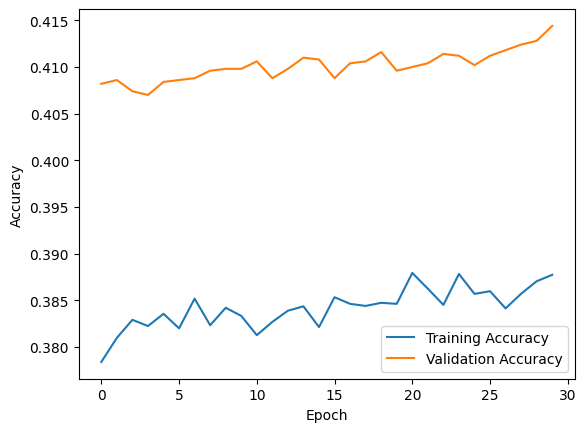

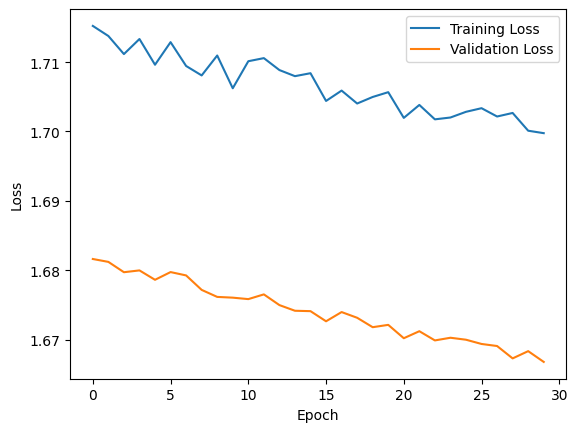

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Metrics suggest about the model’s performance over time.

Training Accuracy and Loss:
Generally, you expect training accuracy to increase and training loss to decrease over epochs as the model learns from the training data. If training accuracy continues to increase while training loss continues to decrease, it suggests that the model is learning well.
If training accuracy plateaus or starts decreasing, it could indicate overfitting, where the model is memorizing the training data instead of generalizing well to unseen data.
If training loss stops decreasing and starts increasing, it could indicate that the model has converged to a suboptimal solution or is overfitting.
Validation Accuracy and Loss:
Validation accuracy and loss provide insight into how well the model generalizes to unseen data.
Ideally, validation accuracy should follow a similar trend to training accuracy, but it may not reach the same level due to differences between training and validation data.
If validation accuracy increases along with training accuracy, it suggests that the model is generalizing well to unseen data.
If validation accuracy starts lagging significantly behind training accuracy or if validation loss starts increasing while training loss decreases, it suggests overfitting.

# 8. Making Predictions

In [18]:
predictions = model.predict(x_test[:10])
print('Predictions:', predictions.argmax(axis=1))
print('True labels:', y_test[:10].argmax(axis=1))

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions: [3 8 8 8 4 6 3 2 5 1]
True labels: [3 8 8 0 6 6 1 6 3 1]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


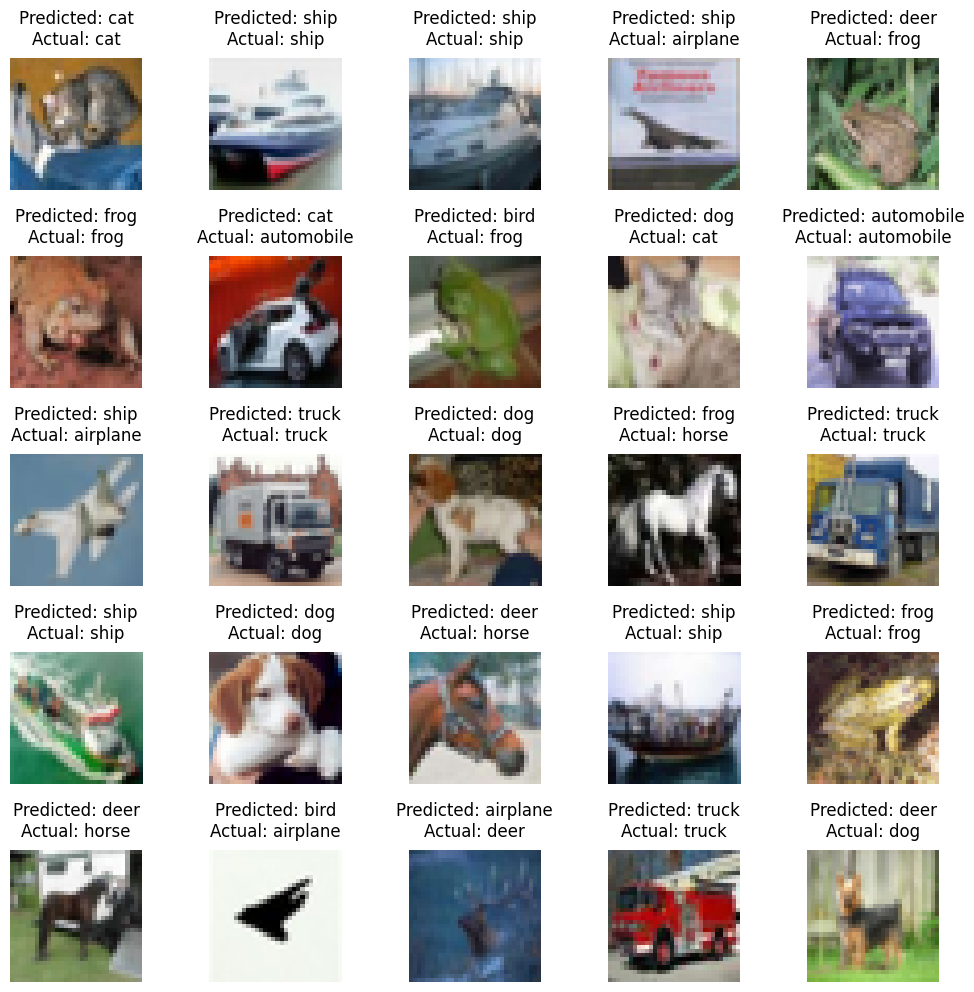

In [19]:
# Visualize some predictions
plt.figure(figsize=(12, 12))  # Adjust the figure size for better spacing

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {class_names[predicted_labels[i]]}\nActual: {class_names[np.argmax(y_test[i])]}', pad=10)  # Add padding to the title
    plt.axis('off')

plt.show()


# 9. Conclusion


# Key Learnings:

Data Preprocessing: Understanding the importance of preprocessing techniques like normalization and one-hot encoding to prepare data for training.

Neural Network Construction: Learning to build neural network architectures using Keras, including the Sequential model and various layers like Dense and Flatten.

Model Compilation and Training: Familiarity with compiling the model by specifying loss functions, optimizers, and metrics, and training the model using training data.

Model Evaluation: Evaluating model performance using test datasets and interpreting metrics like loss and accuracy.

Visualization of Training Progress: Visualizing training and validation metrics to monitor model performance and identify potential issues like overfitting or underfitting.

Making Predictions: Using trained models to make predictions on new data and assessing their accuracy.
    
# Potential Improvements and Real-world Applicability:

Architecture Optimization: Experiment with different neural network architectures, including deeper networks or convolutional neural networks (CNNs), to potentially improve performance.

Hyperparameter Tuning: Fine-tuning hyperparameters such as learning rate, batch size, and number of epochs can further enhance model performance.

Data Augmentation: Augmenting the dataset with transformations like rotation, scaling, or flipping can increase dataset diversity and improve model generalization.

Transfer Learning: Utilizing pre-trained models (e.g., pre-trained CNNs like VGG, ResNet) and fine-tuning them on the CIFAR-10 dataset can lead to better performance, especially with limited computational resources.

Ensemble Learning: Combining predictions from multiple models (ensemble learning) can often lead to improved accuracy and robustness.

Real-world Deployment: Deploying the trained model in real-world applications such as image recognition systems, object detection, or autonomous vehicles can provide valuable insights and practical experience in deploying deep learning models.